In [1]:
%matplotlib inline

In [2]:
!pip install kscorer prosphera

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from kscorer.kscorer import KScorer
from prosphera.projector import Projector

In [4]:
X, y = datasets.load_digits(return_X_y=True)
X.shape

(1797, 64)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=1234)

In [6]:
ks = KScorer()
labels, centroids, _ = ks.fit_predict(X_train, retall=True)

0it [00:00, ?it/s]

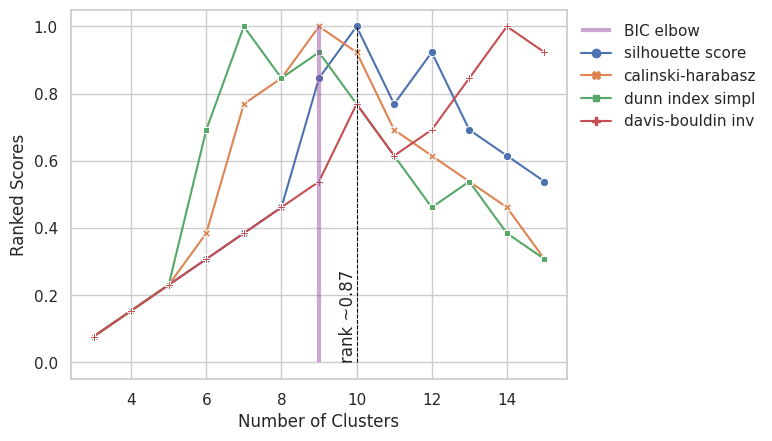

In [7]:
ks.show()

In [8]:
ks.optimal_

10

In [9]:
labels_mtx = (pd.Series(y_train)
              .groupby([labels, y_train])
              .count()
              .unstack()
              .fillna(0))

# match arbitrary labels to ground-truth labels
order = []

for i, r in labels_mtx.iterrows():
    try:
        left = [x for x in np.unique(y) if x not in order]
        order.append(r.iloc[left].idxmax())
    except ValueError:
        break

confusion_mtx = labels_mtx[order]
confusion_mtx

,5,8,0,2,6,4,7,1,9,3
0,140.0,7.0,0.0,0.0,0.0,1.0,4.0,1.0,4.0,2.0
1,0.0,46.0,0.0,2.0,0.0,0.0,1.0,42.0,31.0,12.0
2,1.0,0.0,155.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0
3,0.0,0.0,0.0,110.0,0.0,0.0,0.0,31.0,0.0,20.0
4,3.0,7.0,3.0,0.0,144.0,0.0,0.0,3.0,1.0,0.0
5,1.0,0.0,1.0,0.0,1.0,133.0,0.0,0.0,0.0,0.0
6,0.0,5.0,0.0,4.0,0.0,9.0,129.0,0.0,3.0,6.0
7,0.0,65.0,0.0,13.0,6.0,2.0,1.0,71.0,2.0,6.0
8,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,70.0
9,2.0,14.0,0.0,20.0,1.0,0.0,19.0,0.0,10.0,42.0


In [10]:
# to make vectors precisely normalized
centroids = normalize(centroids)
labels_unseen = ks.predict(X_test, init=centroids)

In [11]:
y_clustd = pd.Series(labels).replace(dict(enumerate(order)))
y_unseen = pd.Series(labels_unseen).replace(dict(enumerate(order)))

In [12]:
balanced_accuracy_score(y_train, y_clustd)

0.7024905027180692

In [13]:
balanced_accuracy_score(y_test, y_unseen)

0.5984686219340951

In [14]:
visualizer = Projector(renderer='colab')

visualizer.project(
    data=X_train,
    labels=y_clustd,
    meta=y_train)